# This Notebook is my first entry in a Zindi Competition
The title of the competition is "Zimnat Insurance"

Published by Emmanuella Budu

SO to begin, we will import the necessary libraries

In [2]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier 
from xgboost import XGBRegressor

Next, we will load the datset that contains information on demographic information and what financial services are used by approximately 33,610 individuals across East Africa.

In [5]:
#Data Set

tunisiafraud_df = pd.read_csv('C:/Users/Emmanuella\OneDrive - University of Botswana/Zindi/Tunisia Fraud/Train.csv')
tunisiafraud_df_test = pd.read_csv('C:/Users/Emmanuella\OneDrive - University of Botswana/Zindi/Tunisia Fraud/Test.csv')
tunisiafraud_df.head(5)

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,49,14185,P,99,1,6101,4,2,2,2,...,13.575957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,...,11.692894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,...,16.237871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,...,13.399983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id4


View the dataset

In [6]:
tunisiafraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25053 entries, 0 to 25052
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 23.1+ MB


In [4]:
#check for null values

tunisiafraud_df.isnull().any()

BCT_CODBUR      False
CTR_MATFIS      False
CTR_CATEGO_X    False
FJU_CODFJU      False
CTR_CESSAT      False
                ...  
FAC_MNTPRI_C     True
FAC_MFODEC_C     True
FAC_MNTDCO_C     True
FAC_MNTTVA_C     True
id              False
Length: 121, dtype: bool

In [7]:

tunisiafraud_df.nunique()

BCT_CODBUR        158
CTR_MATFIS      13454
CTR_CATEGO_X        4
FJU_CODFJU         16
CTR_CESSAT          3
                ...  
FAC_MNTPRI_C     2355
FAC_MFODEC_C      566
FAC_MNTDCO_C       38
FAC_MNTTVA_C     2313
id              25053
Length: 121, dtype: int64

In [8]:
#Fill in missing values

tunisiafraud_df.fillna(0)

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,49,14185,P,99,1,6101,4,2,2,2,...,13.575957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,...,11.692894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,...,16.237871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,...,13.399983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train_id4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,235,403,C,99,0,2999,4,1,2,2,...,16.183079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train_id25048
25049,700,12435,M,22,0,3917,4,2,2,2,...,0.000000,53149031.0,0.0,0.0,9566825.0,0.0,0.0,0.0,0.0,train_id25049
25050,408,12561,P,99,0,6272,4,2,2,2,...,15.320684,0.0,0.0,0.0,0.0,14838510.0,0.0,0.0,2670930.0,train_id25050
25051,412,5320,P,99,0,6312,8,2,2,2,...,15.682378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train_id25051


Looks like none of them are null, lets see the categorical values

Divide into X and Y

In [9]:
y= tunisiafraud_df.target
X =tunisiafraud_df


X_test= zimnat_df_test

print(X)

       BCT_CODBUR  CTR_MATFIS CTR_CATEGO_X  FJU_CODFJU  CTR_CESSAT  \
0              49       14185            P          99           1   
1             221        6032            P          99           0   
2             181        8907            P          99           0   
3             252        5783            M          22           0   
4             234        1477            P          99           0   
...           ...         ...          ...         ...         ...   
25048         235         403            C          99           0   
25049         700       12435            M          22           0   
25050         408       12561            P          99           0   
25051         412        5320            P          99           0   
25052         404         838            M          22           0   

       ACT_CODACT  CTR_OBLDIR  CTR_OBLACP  CTR_OBLRES  CTR_OBLFOP  ...  \
0            6101           4           2           2           2  ...   
1          

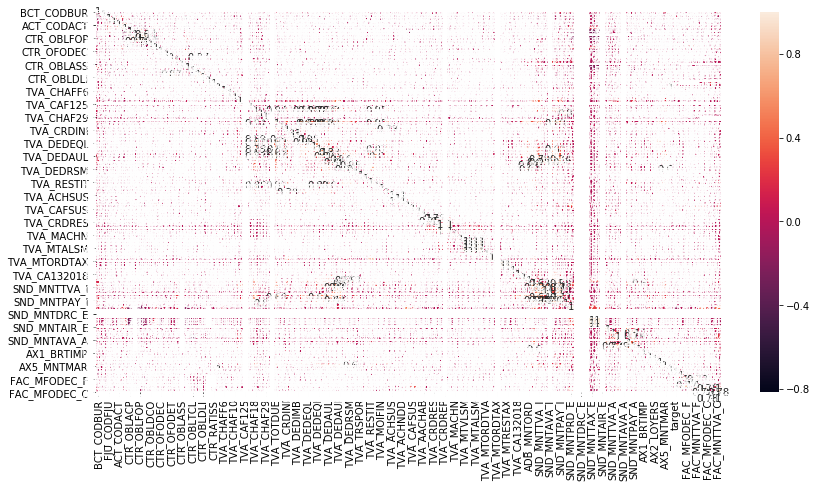

In [11]:
plt.figure(figsize=(14,7))
#sns.heatmap(data=df, annot=True)
cor = tunisiafraud_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.7, test_size=0.3,
                                                      random_state=0)
print(y_train)

13954     0.000000
23552    16.878760
12327    15.209389
19867    19.167925
24545    14.734843
           ...    
13123    13.111260
19648     0.000000
9845     15.806399
10799     0.000000
2732     18.386268
Name: target, Length: 17537, dtype: float64


In [13]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]


In [11]:

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()
label_X_test = X_test.copy()
label_y_train = y_train.copy()
label_y_valid = y_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cat_label:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])
    label_X_test[col] = label_encoder.transform(X_test[col])
    
label_encoder2=LabelEncoder()

label_y_train=label_encoder2.fit_transform(y_train)
label_y_valid=label_encoder2.fit_transform(y_valid)

In [15]:
#fit the ML model on input data and respective outputs


#Random Forest Model
#model = RandomForestClassifier(n_estimators=900, random_state=20)
#model.fit (OH_X_train, label_y_train)
#model.fit (label_X_train, label_y_train)
# get importance
#importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
   # print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()


#CATBOOST
#clf=CatBoostClassifier(
#iterations=110,
#learning_rate =0.1)

#clf.fit(X_train,y_train,
 #      cat_features=cat_features,
  #     eval_set=(X_valid, y_valid),plot=True)


#test the model with validation data
 
#y_testing = clf.predict(X_valid)
#Evaluate the performance of the model
#print(accuracy_score(y_valid,y_testing))

#y_pred= clf.predict(X_test)
##############END OF CATBOOST



#XGBOOST
xg =XGBRegressor(n_estimators=100, learning_rate=0.05)
xg.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], verbose=False)

#test the model with validation data
# = model.predict(OH_X_valid)
y_testing = xg.predict(X_valid)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_testing, y_valid)))


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields CTR_CATEGO_X, id

In [ ]:
#Write results of predictions to csv file

predictions_file = pd.DataFrame({'uniqueid': finance_df_test['uniqueid']+ " x "+finance_df_test['country'],'bank_account': y_pred})
predictions_file.head(10)
predictions_file.to_csv('financial.csv', index=False)
print("Done with predictions!")